In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('/content/drive/MyDrive/Tweet/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [75]:
# To remove patterns from the text
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

In [76]:
names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

In [77]:
# to remove stop words from the text
def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

In [78]:
# To tokenize the text
def tokenize(d):
    return word_tokenize(d)

In [79]:
# Applying all the functions 
df['final_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df.final_text.head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: final_text, dtype: object

In [80]:
# Converting tokens to strings
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
# Adding neagtivereason to strings
df['final_text_2'] = df['negativereason'].fillna('') + ' ' + df['final_text']
df[['final_text' , 'final_text_2']]

,final_text,final_text_2
0,dhepburn said,dhepburn said
1,plus youve added commercials experience tacky,plus youve added commercials experience tacky
2,didnt today must mean need take another trip,didnt today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...,Bad Flight really aggressive blast obnoxious e...
4,really big bad thing,Can't Tell really big bad thing
...,...,...
14635,thank got different chicago,thank got different chicago
14636,leaving minutes late warnings communication mi...,Customer Service Issue leaving minutes late wa...
14637,please bring blackberry,please bring blackberry
14638,money change dont answer phones suggestions ma...,Customer Service Issue money change dont answe...


In [82]:
# Picking out X and y from the data
X = df.final_text_2
y = df.airline_sentiment

In [83]:
# Splliting the X and y into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 4)

In [84]:
X_train

7013         lord whyjetblue fleets fleek httptconlzsehnee
6356      thanks reminding upcoming trip florida really...
927      Can't Tell still waiting hear back wallet stol...
12699                   Can't Tell backpack need see agent
6332     Bad Flight first cockroaches crawling counter ...
                               ...                        
6017                                  hi guys good morning
709       thank cheese platter abundance entertainment ...
10679    Late Flight dirty damn plane take hour get pla...
8366     Bad Flight apparently pilot made announcement ...
1146     Customer Service Issue contacted directly phon...
Name: final_text_2, Length: 11712, dtype: object

In [85]:
y_train

7013      neutral
6356      neutral
927      negative
12699    negative
6332     negative
           ...   
6017     positive
709      positive
10679    negative
8366     negative
1146     negative
Name: airline_sentiment, Length: 11712, dtype: object

In [86]:
X_test

6088      inflight entertainment tonight willie nelson ...
13176    Cancelled Flight second put cancelled flightle...
6110      flying chicagolaxphx go spotting lax phx airp...
13284    Can't Tell wrote back saying challenging weekt...
702       im flying st class one leg chicago long china...
                               ...                        
8562      airways corporation registers high short inte...
5706                                         status stlaus
7065                                     wow keeping times
405                                    dollar laxlas fares
10029    Customer Service Issue mobile app horrible nee...
Name: final_text_2, Length: 2928, dtype: object

In [87]:
y_test

6088      neutral
13176    negative
6110      neutral
13284    negative
702       neutral
           ...   
8562      neutral
5706      neutral
7065     positive
405       neutral
10029    negative
Name: airline_sentiment, Length: 2928, dtype: object

In [88]:
# TF-IDF Vectorizer
def tfidf(words):
    tfidf_vectorizer = TfidfVectorizer()
    data_feature = tfidf_vectorizer.fit_transform(words)
    return data_feature, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train.tolist())
X_test_tfidf = tfidf_vectorizer.transform(X_test.tolist())

In [90]:
# Logistic Regression Model to predict
lr_tfidf = LogisticRegression(random_state=42,solver = 'liblinear')
lr_tfidf.fit(X_train_tfidf, y_train)
y_predicted_lr = lr_tfidf.predict(X_test_tfidf)

In [91]:
# Function to print accuaracy, precision and recall
def score_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted,average= 'macro')
    recall = recall_score(y_test, y_predicted,average='macro')
    f1 = f1_score(y_test, y_predicted,average='macro')
    print("accuracy = %0.3f, precision = %0.3f, recall = %0.3f, f1 = %0.3f" % (accuracy, precision, recall, f1))

In [92]:
score_metrics(y_test, y_predicted_lr)

accuracy = 0.924, precision = 0.888, recall = 0.852, f1 = 0.867


In [93]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_test, y_predicted, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, fmt='.20g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

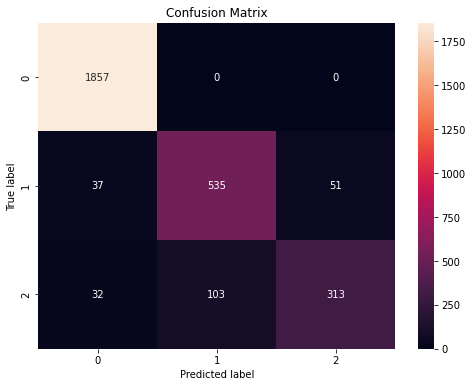

In [94]:
plot_confusion_matrix(y_test, y_predicted_lr)

In [95]:
t = input("Enter String : ")
t={'text':t}
t = pd.DataFrame(t,index=[0])
t = tfidf_vectorizer.transform(t.text.tolist())
out = lr_tfidf.predict(t)
print('Sentiment Value : ',str(out))

Enter String : bad
Sentiment Value :  ['negative']
